# Homework 2
## Problem 3

a.) Compare the models (Y is for salary):
$$ Y = \hat{\beta}_0 +\hat{\beta}_0X_1 + ...$$

$$ Y = 50 + 20(GPA) + 0.07(IQ) + 35(Gender) + 0.01(GPA:IQ)+ -10(GPA:Gender) $$

If IQ and GPA is kept constant, we will only be comparing the parameters that include $\hat{\beta}_3$ and $\hat{\beta}_5$.

If female:
$$ Y = stuff + 35 * 1 + -10 * GPA * 1 = $$
$$ stuff + 35 - 10 * GPA $$
If male:
$$ Y = stuff + 35 * 0 + -10 * GPA * 0 $$
$$ Y = stuff $$

Conclusion: If the female's GPA is > 3.5, the male will earn more. (Option iii).

b.)
$$ 50 + 20 * 4.0 * 0.07 * 110 + 35 * 1 + 0.01 * 4.0 * 110 + -10 * 4 * 1 = 137.1 $$

A female with an IQ of 110 and GPA of 4.0 is estimated to earn $137,100

c.) The coefficients don't say much about the interaction effect. Whether the effect exists or not is decided by the ideas from variance, RSS, and the $R^2$ statistic. The magnitude of the effect can say a bit, but it all depends on the values of the data.

## Problem 14

In [1]:
set.seed(1)
x1 = runif(100)
x2 = 0.5 * x1 + rnorm(100)/10 #x2 is a function of x1.
y = 2 + 2 * x1 + 0.3 * x2 + rnorm(100) # y is a function of x1 and x2.

The true coefficients are:
$$\beta_0 = 2\\ \beta_1 = 2 \\ \beta_2 = 0.3$$

[1] 0.8351212

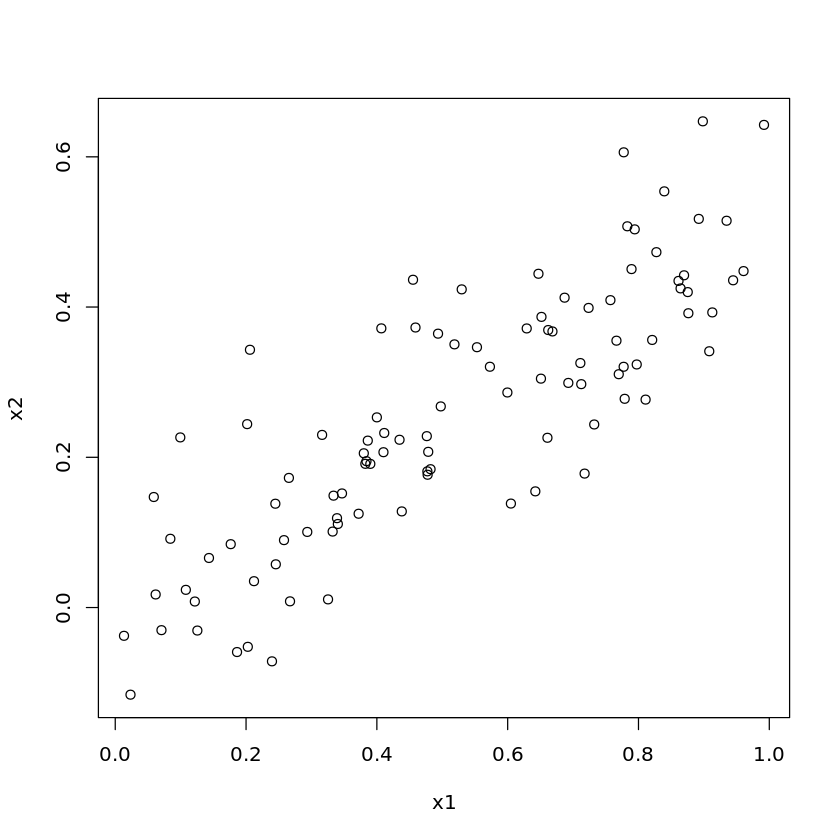

In [2]:
plot(x1, x2)
cor(x1,x2)

__b.)__ Scatterplot above.

The correlation constant (R^2 value) between x1 and x2 is __0.835__.

Find the linear model of response Y with predictors x1 and x2.

In [3]:
lm.fit = lm(y~x1+x2)

In [4]:
summary(lm.fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


The regression coefficients are:
$$\beta_0 = 2.13\\ \beta_1 = 1.44 \\ \beta_2 = 1.01$$

In [5]:
confint(lm.fit)
mean(y)

,2.5 %,97.5 %
(Intercept),1.670278673,2.590721
x1,0.008213776,2.870897
x2,-1.240451256,3.259800


[1] 3.135623

__c.)__ The p-values for this model are pretty high, so it is hard to reject the null hypothesis for B_1, but much harder to reject it for B_2.

The intercept for B0 is close to the true model, but the B_1 and B_2 values are pretty off from the true numbers. 

Moreover, the RSE is 1.056 and the mean for Y is 3.135, making the standard error just under 34%.

In [6]:
lmx1.fit = lm(y~x1)
summary(lmx1.fit)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


__d.)__ This model says that there is a much better model using just x1, rather than both x1 and x2, demonstrating the effects of collinearity.

We can easily reject the null hypothesis for x1 here, and the standard error is the same 34%.

In [7]:
lmx2.fit = lm(y~x2)
summary(lmx2.fit)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


__e.)__ This model says similarly. Running a model on just x2 is better than running it on both x1 and x2.

We can easily reject the null hypothesis for x1 here, and the standard error is also about 34%.

__f.)__ No. Since x2 is dependent upon x1, it makes sense that treating them as independent columns will screw up our model, since we're essentially overcompensating for the effects of both x1 and x2 together.

In [8]:
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)

In [9]:
lm.fit = lm(y~x1+x2)
summary(lm.fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06


In [10]:
lmx1.fit = lm(y~x1)
summary(lmx1.fit)


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05


In [11]:
lmx2.fit = lm(y~x2)
summary(lmx2.fit)
mean(x2)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


[1] 0.2625402

We can see that the the ```y~x1+x2``` model changed. The x1 and x2 models have changed dramatically, making the p-value for B_2 lower and for B_1 higher. We can now reject the null hypothesis for B_2, but no longer for B_1.

The original estimate for B1 was 1.4, with a standard error of 0.72. The added value of 0.1 is more than 2 standard deviations off, so this was definitely an outlier.

For B2, the original estimate was 1.0, but a high standard error of 1.1. The added value of 0.8 was within the 95% confidence interval, but that interval was extremely large, so it doesn't mean much. It's not quite an outlier, but the confidence interval was extremely big.

We can also threat this point as a high leverage point, since x1 was so far off from the other x1's.

---

For the ```y~x1``` model, the  added point was definitely both an outlier (2+ standard deviations off) and a high-leverage point (added x1 value was far off from mean). We made the model worse--the true value of 2 was first regressed to 1.9, and now to 1.7. Our standard error also increased.

---

The ```y~x2``` model: The first model, which had a large error for B2 (2.899) made the added point both an outlier and a high-leverage point. This increased the estimate for B2, making it further away from the true value of 0.3.